In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from constants import numeric_columns as num_cols


#in titanic
#   import math

In [2]:
#scaling, normalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#kmeans, dbscan, hierarchical (sklearn)
from sklearn.cluster import DBSCAN

#in titanic fa con scipy
    #from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#vedere se serve
#evaluation
from sklearn.metrics import silhouette_score

#vedere se serve
#distance matrix (dbscan elbow, hierarchical)
from scipy.spatial.distance import pdist, squareform


In [3]:
#df = pd.read_csv("pp_train.csv")
df = pd.read_csv("df_pp_log.csv")
df.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,...,is_Fantasy,is_Family,is_Mystery,is_Talk-Show,is_Drama,is_Sport,is_War,is_Horror,is_Animation,fill_runtimeMinutes
0,Neogenic Nightmare Chapter 3: Hydro-Man,8,7.598900,NaN,NaN,0.000000,6.659294,0.693147,0.000000,3.091042,...,0,0,0,0,0,0,0,0,1,3.713572
1,Looping,6,7.592366,NaN,NaN,0.000000,2.484907,0.693147,0.000000,0.693147,...,0,0,0,0,0,0,0,0,0,3.367296
2,Idealnaya para,6,7.597396,NaN,NaN,0.000000,3.663562,0.693147,0.000000,3.218876,...,0,0,0,0,0,0,0,0,0,4.510860
3,MasterChef Celebrity México,6,7.611842,NaN,NaN,0.000000,2.772589,3.135494,0.000000,4.043051,...,0,0,0,0,0,0,0,0,0,3.465736
4,Seutateueob,8,7.611348,7.611348,80.0,0.693147,9.662625,5.852202,1.098612,3.871201,...,0,0,0,0,1,0,0,0,0,4.394449


In [4]:
df["awardWins"].value_counts()

awardWins
0.000000    14589
0.693147      860
1.098612      354
1.386294      173
1.609438      116
1.791759       74
2.079442       43
1.945910       36
2.197225       30
2.397895       20
2.302585       20
2.484907       16
2.564949       14
2.639057        7
2.833213        6
2.708050        6
3.044522        5
3.295837        5
2.995732        5
3.218876        5
2.890372        5
3.178054        5
2.772589        5
3.367296        4
2.944439        3
3.433987        2
3.912023        2
3.091042        2
3.583519        1
3.637586        1
3.784190        1
3.610918        1
4.430817        1
4.343805        1
3.135494        1
3.931826        1
3.258097        1
3.465736        1
4.143135        1
4.330733        1
3.401197        1
4.700480        1
3.688879        1
4.060443        1
3.555348        1
4.983607        1
3.871201        1
Name: count, dtype: int64

In [5]:
#columns 
#   'startYear', 'runtimeMinutes', 'awardWins', 'numVotes', 'totalImages',
#   'totalVideos', 'totalCredits', 'criticReviewsTotal', 'awardNominationsExcludeWins',
#   'numRegions', 'userReviewsTotal','ratingCount'
# ????
#   'rating', 'canHaveEpisodes', 'isAdult', 'genres' (as 1henc or as a count?)

In [6]:
features = df[['startYear', 'fill_runtimeMinutes', 'awardWins', 'numVotes', 'totalImages','totalVideos', 'totalCredits', 'criticReviewsTotal', 
               'awardNominationsExcludeWins','numRegions', 'userReviewsTotal']]

X = features.values

In [7]:
#presuppongo di voler fare poi i controlli cluster in abse a titletype
y = np.array(df['titleType']) 
#a way to define x and y; they are the numpy arrays of the dataset

y_map = {
    0: 'tvEpisode',
    1: 'videoGame',
    2: 'movie',
    3: 'tvSeries',
    4: 'video',
    5: 'tvMiniSeries',
    6: 'short',
    7: 'tvMovie',
    8: 'tvSpecial',
    9: 'tvShort'
}
y_mapped = pd.DataFrame(y).iloc[:,0].map(y_map)
#y is our target label; mapped into strings (y_map)

### Normalizations 

In [8]:
## Sklearn -> inizializza metodo, fit su dati che abbiamo, transform/predict in base al metodo

In [9]:
# z-score, fit and then transform
scaler = StandardScaler()   #inizialize the standard scaler
scaler.fit(X) #fit the scaler on the data; x è la numpy matrix of the dataset
X_scal = scaler.transform(X) #transform to have the scaled version

In [10]:
# min-max, fit and trasform directly
scaler = MinMaxScaler()
X_minmax = scaler.fit_transform(X) #fit e scaler in una riga sola

## DBSCAN

In [11]:
dbscan = DBSCAN(eps=0.45, min_samples=250, metric="euclidean")
dbscan.fit(X_minmax)

#initiialize and fit into data --> procedura che faremo anche noi

DBSCAN(eps=0.45, min_samples=250)

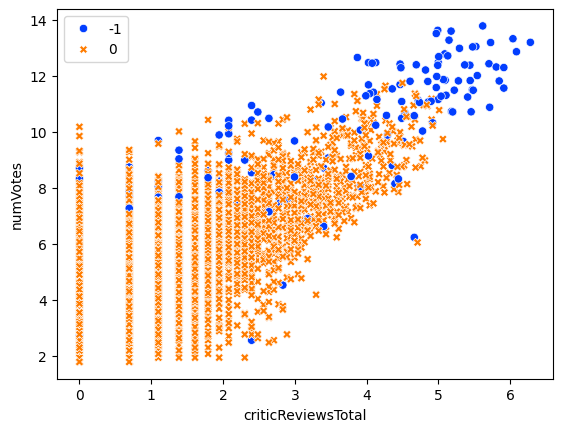

In [12]:
sns.scatterplot(data=df,
                x="criticReviewsTotal", 
                y="numVotes", 
                hue=dbscan.labels_, 
                style=dbscan.labels_, 
                palette="bright")
plt.show()


In [13]:
np.unique(dbscan.labels_, return_counts=True)
#to have the classification of the different clusters (messi dopo -> -1 è il noise) e quanti points in ogni cluster

(array([-1,  0], dtype=int64), array([  149, 16282], dtype=int64))

In [14]:
dbscan.labels_

#possiamo accedere alle label-> possiamo fare quello che vogliamo

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
# counting silhouette also w.r.t to noise cluster (-1)
#   print('Silhouette', silhouette_score(X_minmax, dbscan.labels_)) 

#considering DBSCAN but not noise cluster
#   print('Silhouette', silhouette_score(X_minmax[dbscan.labels_ != -1], dbscan.labels_[dbscan.labels_ != -1])) 

#when we measure silh. on DBSCAN labels we would count the silh. also with respect to noise cluster (-1)
#se non si considerano il noise cl. la silhouette è higher perchè noise points are far and so this influences silh. due to the long distances  
#so everytime that we measure the silhouette for DBSCAN scartiamo anche noise così misuriamo risultato solo sui cluster

### kth neighbor distance

In [16]:
#misuro distanze dal kth nearest n. -> usando pairwise distance da ogni pt (ptovo con eucl)
dist = pdist(X_minmax, 'euclidean') 
dist = squareform(dist)

#risultato -> array compresso con distanze per ogni coppia di punti nel dataset.

In [17]:
#chat
#   k = 4  # Numero di vicini da considerare
#   k_distances = np.sort(dist, axis=1)[:, k]  # Prendi la distanza del k-esimo vicino

In [18]:
#chat
#   plt.plot(np.sort(k_distances))
#   plt.xlabel('Points')
#   plt.ylabel(f'{k}-th Nearest Neighbor Distance')
#   plt.title('Elbow Method for DBSCAN')
#   plt.show()

In [19]:
k=4
kth_distances = []

for d in dist:  # d is a vector containing distances between the ith record and all the others
    index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
    kth_distances.append(d[index_kth_distance])  # store the distance in a list

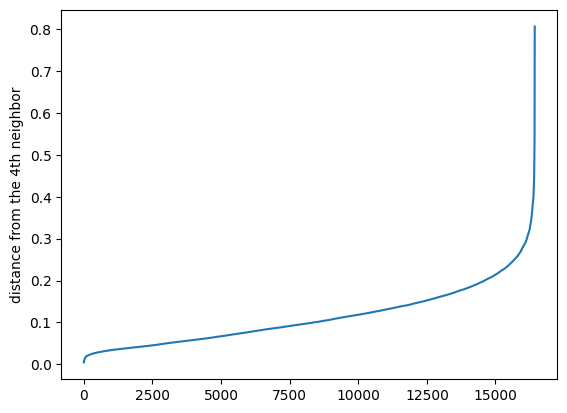

In [20]:
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('distance from the {}th neighbor'.format(k))
         
plt.show()

In [21]:

"""
#dobbiamo farlo non solo con il quarto -> helpful if the data is larger
#infatti nell'ultimo, usando il 62 -> if we consider clustering by using 62 points for a point to be considered as a core point vediamo i due cluster
ks = [4, 64, 128, 300]


fig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot
fig_dims = (1, len(ks))

for i in range(len(ks)):
    k = ks[i]
    kth_distances = []

    for d in dist:  # d is a vector containing distances between the ith record and all the others
        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor
        kth_distances.append(d[index_kth_distance])  # store the distance in a list

    plt.subplot2grid(fig_dims, (0, i))
    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
    plt.ylabel('distance from the {}th neighbor'.format(k))
             
plt.tight_layout()
plt.show()


"""

"\n#dobbiamo farlo non solo con il quarto -> helpful if the data is larger\n#infatti nell'ultimo, usando il 62 -> if we consider clustering by using 62 points for a point to be considered as a core point vediamo i due cluster\nks = [4, 64, 128, 300]\n\n\nfig = plt.figure(figsize=(16, 3)) # dimensions of the overall plot\nfig_dims = (1, len(ks))\n\nfor i in range(len(ks)):\n    k = ks[i]\n    kth_distances = []\n\n    for d in dist:  # d is a vector containing distances between the ith record and all the others\n        index_kth_distance = np.argsort(d)[k]  # take the index of the kth nearest neighbor\n        kth_distances.append(d[index_kth_distance])  # store the distance in a list\n\n    plt.subplot2grid(fig_dims, (0, i))\n    plt.plot(range(0, len(kth_distances)), sorted(kth_distances))\n    plt.ylabel('distance from the {}th neighbor'.format(k))\n             \nplt.tight_layout()\nplt.show()\n\n\n"